In [48]:
!pip install --upgrade scipy seaborn matplotlib


In [49]:
!pip install --upgrade scikit-learn


In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,RandomizedSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
#Load the dataset
df = pd.read_csv(r"C:\Users\HP\Documents\chun dataset.zip")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
#A review of the dataset

print("\n Data types and non-null counts:")
print(df.info())

print("\n Summary statistics (numerical columns):")
print(df.describe())

print("\n Preview rows and columns:")
print(df.shape)


 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [53]:
#check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:

df = df.dropna(subset=['TotalCharges'])


In [55]:
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

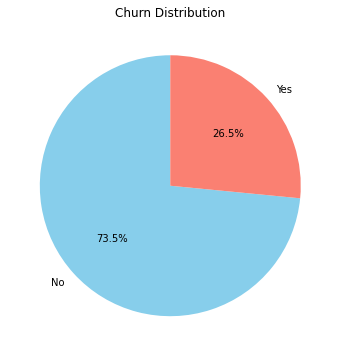

In [57]:
# Distribution of target
churn_counts = df['Churn'].value_counts()

# Pie plot
plt.figure(figsize=(6,6))
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['skyblue','salmon'])

plt.title("Churn Distribution")
plt.show()

In [58]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [59]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [60]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [62]:
print(df.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [63]:
df.columns = df.columns.str.strip()


In [64]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


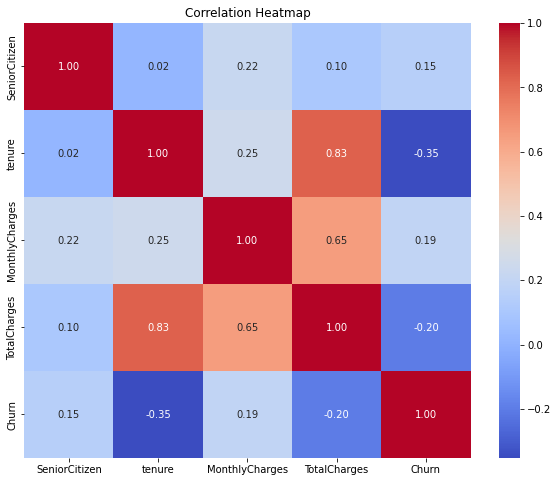

In [65]:
# Ensure numeric columns are correct
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Compute correlation matrix
corr = df[numeric_cols + ['Churn']].corr()

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


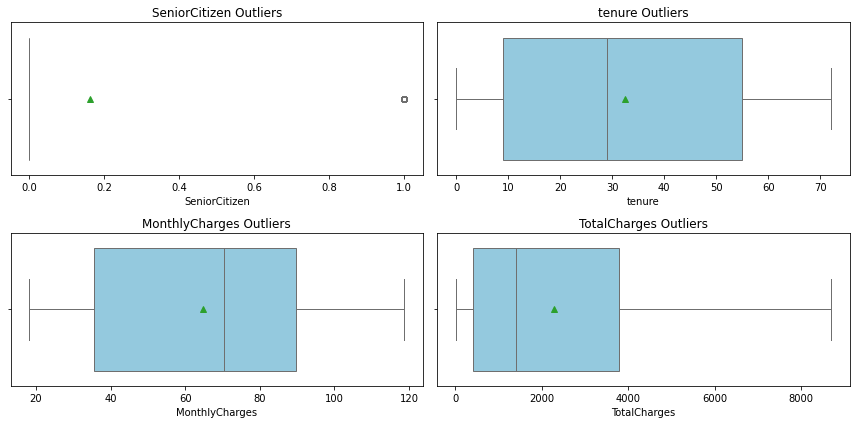

In [66]:
# Boxplots to visualize outliers

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue', showmeans=True)
    plt.title(f"{col} Outliers")
plt.tight_layout()
plt.show()


In [67]:
# Drop customerID (not useful for modeling)
df = df.drop('customerID', axis=1)

# Convert Yes/No columns to 1/0
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=[
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
], drop_first=True)


In [68]:
print(df.columns.tolist())

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [69]:
df.select_dtypes(include='object').columns


Index(['OnlineBackup'], dtype='object')

In [70]:
df['OnlineBackup'].unique()


array(['Yes', 'No', 'No internet service'], dtype=object)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Impute TotalCharges correctly first
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

#  Encode categorical features before split
df_encoded = pd.get_dummies(df, drop_first=True)

# Split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Scale numeric columns AFTER imputation and split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [72]:
!pip install lightgbm

In [73]:
!pip install catboost


In [74]:
!pip install --upgrade numpy


In [75]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = {
    # with class_weight='balanced' to handle imbalance
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    
    # with class_weight for RF
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    
    # with scale_pos_weight (auto-balance)
    "LightGBM": LGBMClassifier(
        n_estimators=300, learning_rate=0.1, class_weight='balanced', random_state=42
    ),
    
    # scale_pos_weight = ratio of negative to positive
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.1, use_label_encoder=False,
        eval_metric='logloss', scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        random_state=42
    ),
    
    # CatBoost automatically handles imbalance if specified
    "CatBoost": CatBoostClassifier(
        iterations=300, learning_rate=0.1, eval_metric='AUC',
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        verbose=0, random_state=42
    )
}


In [76]:
results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Scale only for logistic regression
    if name == "Logistic Regression":
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Added stratified cross-validation for balanced folds
    cv_score = cross_val_score(model, X_tr, y_train, cv=5, scoring='roc_auc').mean()

    # Fit model and predict
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Collect results
    results.append({
        "Model": name,
        "CV ROC-AUC": round(cv_score, 3),
        "Test Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3),
        "Test ROC-AUC": round(auc, 3)
    })


#  Display results summary
df_results = pd.DataFrame(results).sort_values(by="Test ROC-AUC", ascending=False)
print("\nModel Performance Summary:")
print(df_results)


Training Logistic Regression...
Training Random Forest...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to

In [77]:
#Best performing models Hypertuned
#  Logistic Regression 
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

log_reg_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=log_reg_params,
    n_iter=10,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Tuning Logistic Regression...")
log_reg_search.fit(X_train_scaled, y_train)
print("Best Logistic Regression params:", log_reg_search.best_params_)
print("Best Logistic Regression Recall:", log_reg_search.best_score_)


#  XGBoost 
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]  # helpful for imbalance
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=xgb_params,
    n_iter=10,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("\nTuning XGBoost...")
xgb_search.fit(X_train, y_train)
print("Best XGBoost params:", xgb_search.best_params_)
print("Best XGBoost Recall:", xgb_search.best_score_)


# CatBoost 
cat_params = {
    'iterations': [200, 300, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

cat_search = RandomizedSearchCV(
    CatBoostClassifier(verbose=0, random_seed=42),
    param_distributions=cat_params,
    n_iter=10,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("\nTuning CatBoost...")
cat_search.fit(X_train, y_train)
print("Best CatBoost params:", cat_search.best_params_)
print("Best CatBoost Recall:", cat_search.best_score_)


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Logistic Regression params: {'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.001}
Best Logistic Regression Recall: 0.8354515050167224

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost params: {'subsample': 0.8, 'scale_pos_weight': 3, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best XGBoost Recall: 0.7578595317725754

Tuning CatBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best CatBoost params: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4, 'border_count': 64}
Best CatBoost Recall: 0.5157190635451505


In [78]:
#Model Interpretability using shap
!pip install shap

In [79]:
import shap


In [80]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Recreate your trained logistic regression model 
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [82]:
# Initialize SHAP for interactive visualizations
shap.initjs()


In [83]:
# Create a SHAP explainer for the logistic regression model
explainer = shap.Explainer(log_reg, X_train_scaled)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)


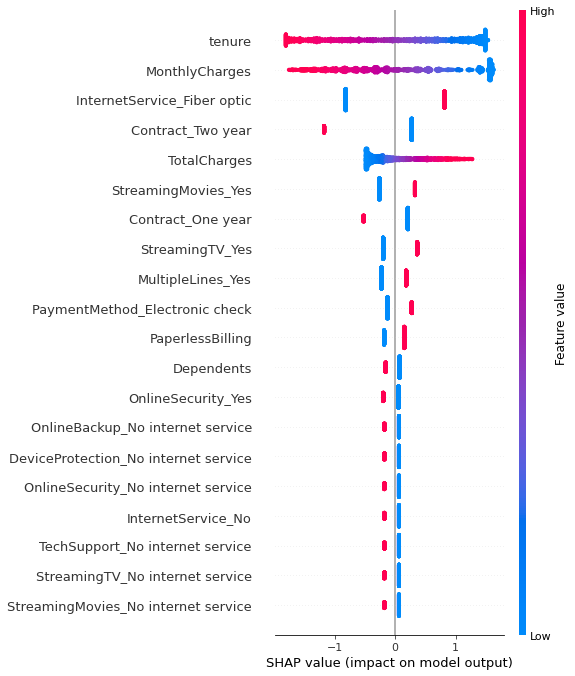

In [84]:
#  Summary plot (dot)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

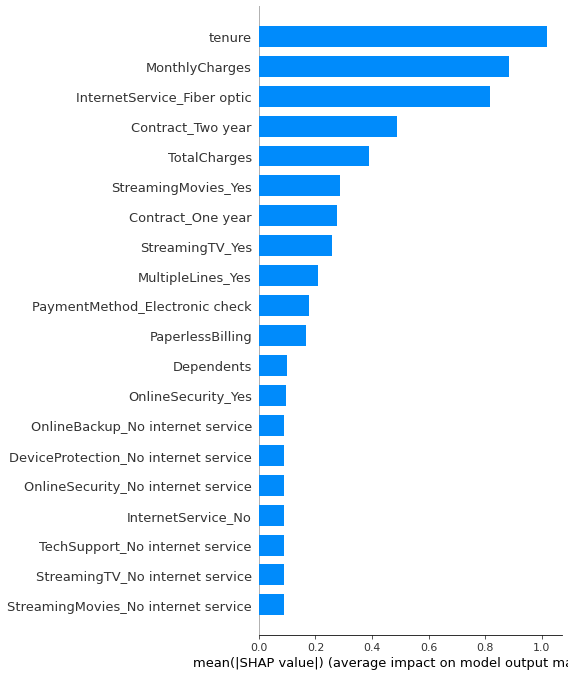

In [85]:
#Bar plot (feature importance)
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X_train.columns)

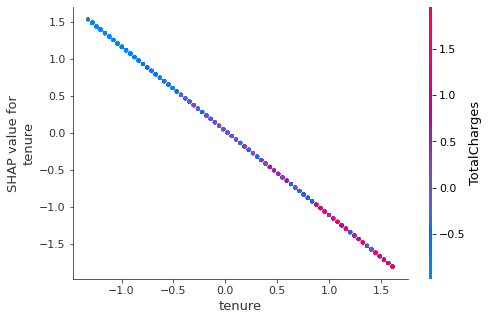

In [86]:
# Dependence plot 
shap.dependence_plot("tenure", shap_values.values, X_test_scaled, feature_names=X_train.columns)

In [87]:
#Force plot
# Choose an instance to explain, e.g., the first one
i = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i].values, X_test_scaled[i], feature_names=X_train.columns)


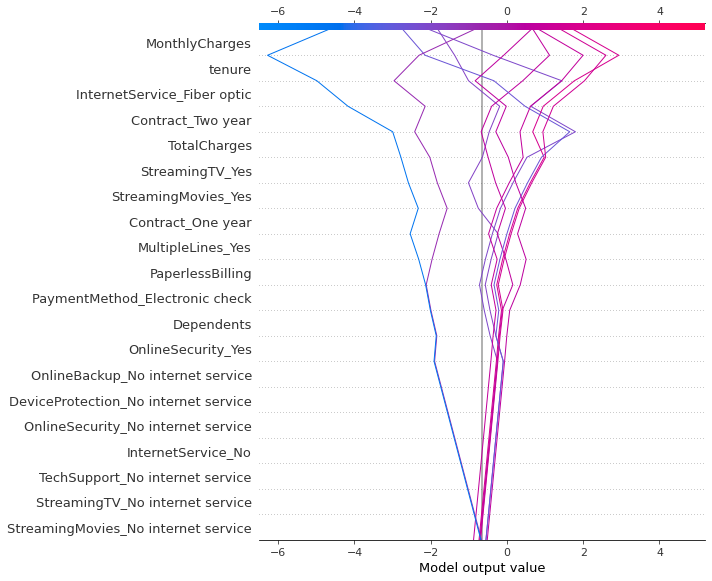

In [88]:
#Decision plot
shap.decision_plot(
    explainer.expected_value, 
    shap_values[:10].values, 
    X_test_scaled[:10], 
    feature_names=list(X_train.columns)  # convert Index to list
)


In [89]:

import joblib
import os

# Create the models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the Logistic Regression model
joblib.dump(log_reg_search.best_estimator_, 'models/best_churn_model.pkl')
print("Model saved successfully!")




Model saved successfully!


In [90]:
import os

# Create templates directory if it doesn't exist
os.makedirs('templates', exist_ok=True)

# Create the HTML file
html_content = '''<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Telco Churn Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #f5f5f5;
        }
        .container {
            background: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }
        .form-group {
            margin-bottom: 15px;
        }
        label {
            display: block;
            margin-bottom: 5px;
            font-weight: bold;
        }
        input, select {
            width: 100%;
            padding: 8px;
            border: 1px solid #ddd;
            border-radius: 4px;
        }
        button {
            background-color: #007bff;
            color: white;
            padding: 10px 20px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        button:hover {
            background-color: #0056b3;
        }
        .prediction {
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
        }
        .churn {
            background-color: #ffebee;
            border: 1px solid #f44336;
        }
        .no-churn {
            background-color: #e8f5e8;
            border: 1px solid #4caf50;
        }
        .error {
            background-color: #ffebee;
            border: 1px solid #f44336;
            color: #c62828;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Telco Customer Churn Prediction</h1>
        <p>Enter customer details to predict churn probability</p>
        
        <form action="/predict" method="post">
            <div class="form-group">
                <label for="SeniorCitizen">Senior Citizen (1 for Yes, 0 for No):</label>
                <input type="number" id="SeniorCitizen" name="SeniorCitizen" min="0" max="1" required>
            </div>
            
            <div class="form-group">
                <label for="MonthlyCharges">Monthly Charges:</label>
                <input type="number" id="MonthlyCharges" name="MonthlyCharges" step="0.01" required>
            </div>
            
            <div class="form-group">
                <label for="TotalCharges">Total Charges:</label>
                <input type="number" id="TotalCharges" name="TotalCharges" step="0.01" required>
            </div>
            
            <div class="form-group">
                <label for="Contract">Contract Type:</label>
                <select id="Contract" name="Contract" required>
                    <option value="Month-to-month">Month-to-month</option>
                    <option value="One year">One year</option>
                    <option value="Two year">Two year</option>
                </select>
            </div>
            
            <div class="form-group">
                <label for="InternetService">Internet Service:</label>
                <select id="InternetService" name="InternetService" required>
                    <option value="DSL">DSL</option>
                    <option value="Fiber optic">Fiber optic</option>
                    <option value="No">No</option>
                </select>
            </div>
            
            <button type="submit">Predict Churn</button>
        </form>
        
        {% if prediction %}
            <div class="prediction {% if prediction.prediction == 'Churn' %}churn{% else %}no-churn{% endif %}">
                {% if prediction.error %}
                    <h3>Error:</h3>
                    <p>{{ prediction.error }}</p>
                {% else %}
                    <h3>Prediction Result:</h3>
                    <p><strong>Prediction:</strong> {{ prediction.prediction }}</p>
                    <p><strong>Churn Probability:</strong> {{ prediction.probability }}%</p>
                    <p><strong>Confidence:</strong> {{ prediction.confidence }}</p>
                {% endif %}
            </div>
        {% endif %}
    </div>
</body>
</html>'''

# Write the HTML file
with open('templates/index.html', 'w') as f:
    f.write(html_content)

print("Templates folder and index.html created successfully!")

Templates folder and index.html created successfully!


In [91]:
import joblib
model = joblib.load('models/best_churn_model.pkl')
print("Model expects:", model.n_features_in_)
print("Feature names (if available):", getattr(model, "feature_names_in_", "Not stored"))



Model expects: 30
Feature names (if available): Not stored


In [92]:
print("Training features:", len(X_train.columns))
print("Model expects:", model.n_features_in_)


Training features: 30
Model expects: 30


In [94]:
import joblib
import pandas as pd

model = joblib.load('models/best_churn_model.pkl')

print("Model expects:", model.n_features_in_, "features")

# Get model feature names if available
if hasattr(model, 'feature_names_in_'):
    print(model.feature_names_in_)
else:
    print("Model feature names not stored. We'll compare manually.")


Model expects: 30 features
Model feature names not stored. We'll compare manually.


In [93]:
import joblib
import pandas as pd

model = joblib.load('models/best_churn_model.pkl')

sample = pd.DataFrame([{
    'SeniorCitizen': 1,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 12,
    'PhoneService': 1,
    'OnlineBackup': 0,
    'PaperlessBilling': 1,
    'MonthlyCharges': 70,
    'TotalCharges': 840,
    'gender_Male': 1,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 1,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 0,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 1,
    'StreamingMovies_No internet service': 0,
    'StreamingMovies_Yes': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0
}])

print(model.predict_proba(sample))


ValueError: X has 29 features, but LogisticRegression is expecting 30 features as input.